# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [13,121,239]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,21217,6208,14982,3095,6707,602
1,4020,3234,1498,2395,264,255
2,47493,2567,3779,5243,828,2253


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

**Observations on each of the features:**

*1. Fresh: *
Both customer 2 and customer 0 are above the mean (and above the 3rd quartile), with customer 2 ordering nearly the double amount compared to customer 0. Customer 1 orders three times less than the mean.

*2. Milk: *
All three customers are within the IQR. Customer 0 orders significantly more than the other two.

*3. Grocery: *
Customer 1 orders especially little, customer 0 especially much. Customer 2 is below average.

*4. Frozen: *
Customer 2 and 0 are both above average, with customer 2 ordering significantly more. Customer 1 is below the mean yet within the IQR.

*5. Detergents_Paper: *
Customer 0 orders especially many detergents (he is above the 3rd quartile). The other two are clearly below the mean.

*6. Delicatessen: *
Customer 2 buy a lot of Delicacies, while the other two are clearly below the mean.

**Conclusion:**
Here is my guess for the category of the establishments.

*Customer 0: *
The fact that he orders a lot of detergents suggests a restaurant (it has to be kept clean). The amount of the ordered Fresh and Grocery products supports this guess. As the customer orders an especially big amount of milk, I would expect the establishment to be a cafe (milk for coffee and other beverages).

*Customer 1: *
Significantly smaller amounts than the other two customers (and the means of the categories) suggest a rather small establishment. As the products are relatively equally distributed among the categories, I would suspect a small shop.

*Customer 2: *
Ordering big amounts of food, yet small amounts of detergent suggest rather a shop than a restaurant. Probably a big shop specializing in delicacies and fresh products.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

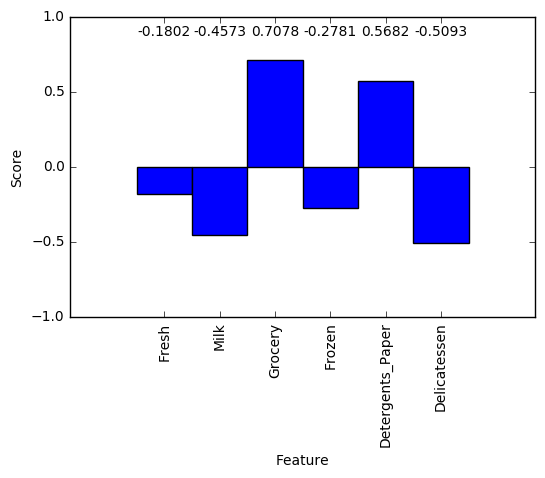

In [11]:
# Instead of reporting the score, I would like to have a look at each of the features:

from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

prediction_score = []
for feature in (list(data)):
    target = data[feature]
    reduced_data = data.drop([feature],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, target, test_size=.25)
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)
    prediction_score.append(regressor.score(X_test,y_test))

y = prediction_score
N = len(prediction_score)
x = range(N)
x_int = np.arange(.5, N + .5, 1)
rects = plt.bar(x, y, width=1)
for idx, rect in enumerate(rects):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., .85, "{:4.4f}".format(prediction_score[idx]), ha='center', va='bottom')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(x_int, list(data),rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.ylim(-1,1)
plt.show()

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I looked at each of the features. The exact scores differ strongly based on the picked test set. Nevertheless, there is a clear trend. The features 'Grocery' and 'Detergent_Paper' tend to get high scores (0.7 and 0.57), while the regressors trained to predict the other features score poorly (all of them have negative scores). Initially, I supposed that the features 'Grocery' and 'Detergent_Paper' can be predicted based on the other given features and are not necessarily needed to predict customers' spending habits, making them irrelevant. However, when I tried to drop one of these features completely (not plotted), the regressor was no longer able to predict the other one. From this, I would draw the conclusion that these two features correlate with each other and that only one of them can be ignored when trying to identify customer segments. This would make both features weakly relevant.   

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

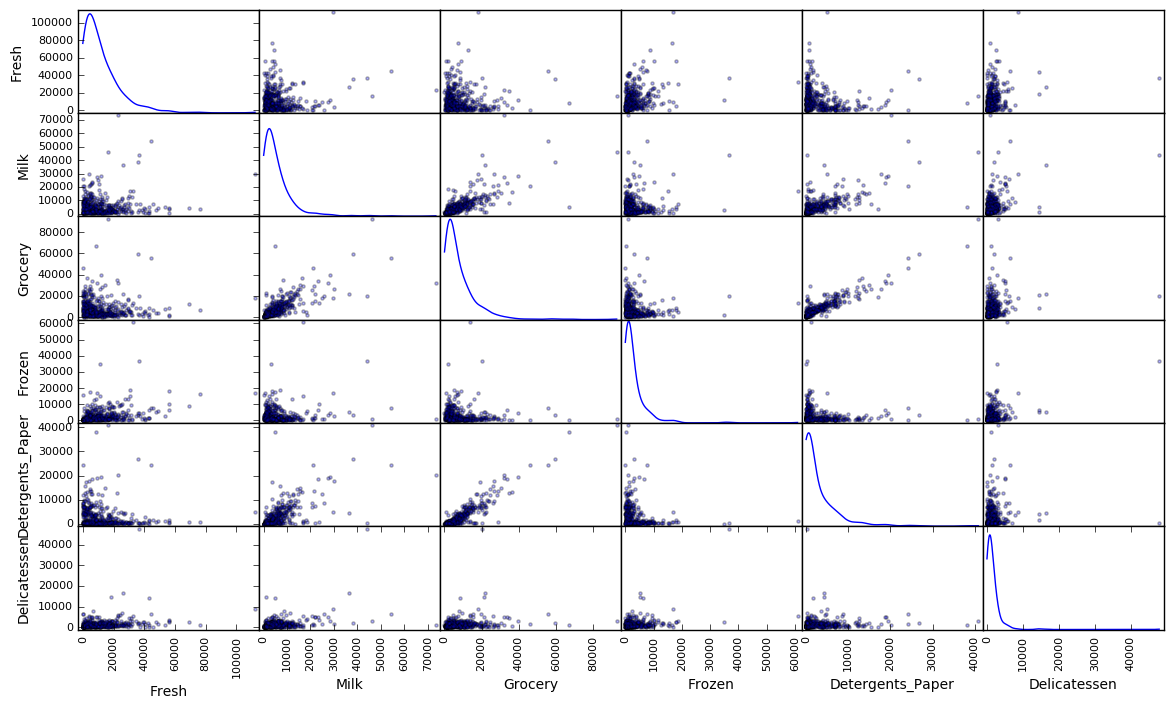

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

As expected, the features 'Grocery' and 'Detergents_Paper' seem to have some degree of correlation (their shared scatter plots look a bit like a line, where the features grow together). The milk feature also may have some degree of correlation with the grocery- and the detergents_paper-features.

I think one could say that all of the features are normally distributed as most of the data can be found near the mean and the number of samples quickly gets lower  with a higher distance from the mean. In this sense, the distribution is more normal than uniform. However, the concentration of samples around the mean is very strong and declines significantly with a bigger distance.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

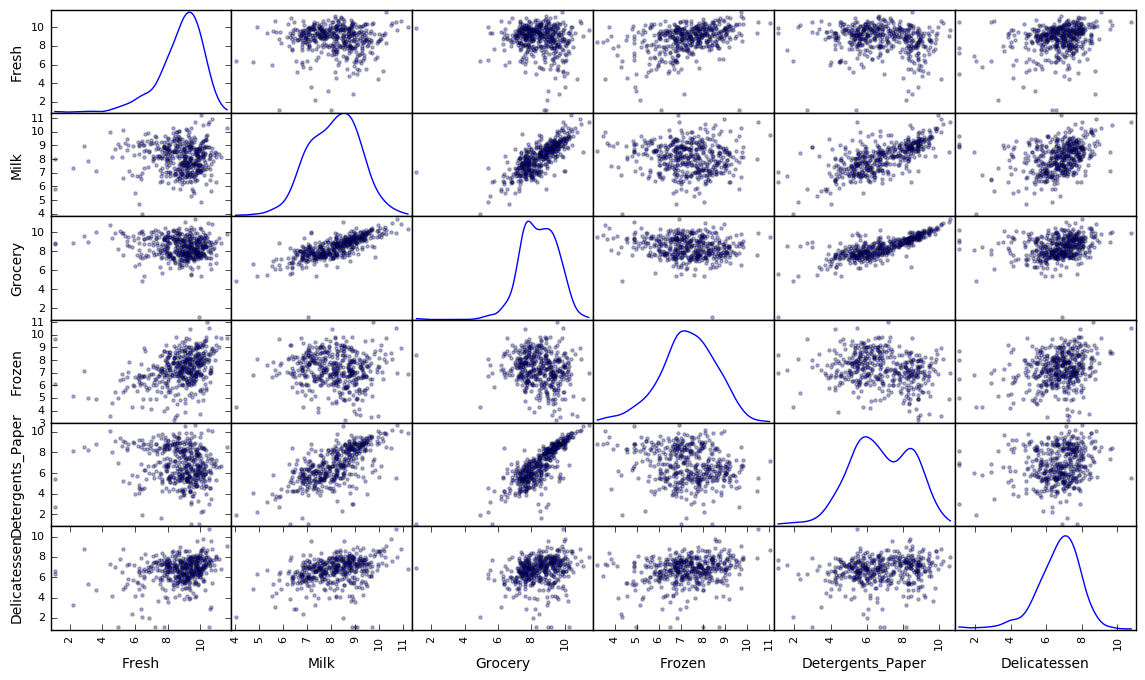

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.962558,8.733594,9.614605,8.037543,8.810907,6.400257
1,8.299037,8.081475,7.311886,7.781139,5.575949,5.541264
2,10.768338,7.850493,8.237215,8.564649,6.719013,7.720018


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [38]:
outlier_set = set()
multi_outlier_set = set()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    Q1 = np.percentile(log_data[feature], 25)

    Q3 = np.percentile(log_data[feature], 75)

    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = log_data[((log_data[feature] < Q1 - step) | (log_data[feature] > Q3 + step))]
    display(outliers)
    # find the indices of outliers and multi-outliers
    outliers_feature = set(outliers.index.tolist())
    shared_outliers = set.intersection(outliers_feature, outlier_set)
    multi_outlier_set.update(shared_outliers)
    outlier_set.update(outliers_feature)

    
# choose the outliers that do not appear in multiple features    
outliers_to_remove = outlier_set - (shared_outliers)

# check whether one of the samples would be removed
if len(outliers_to_remove.intersection(indices)) != 0:
    print 'One of the samples is an outlier'

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[list(outliers_to_remove)]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

*Outliers for more than one feature: * I am not really sure about this, but I have the following intuition: If a sample is an outlier in multiple features, it may be an establishment buying especially much or especially little, but the sample may still have a pattern between the purchases of the features which is consistent with the remaining data and can be used for clustering. So intuitively, I would keep the data points which are outliers in multiple features.

*The points to be removed:*
The points that are outliers in only one category behave inconsistently to the rest of the data and may skew the further analysis. Consequently, they were removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

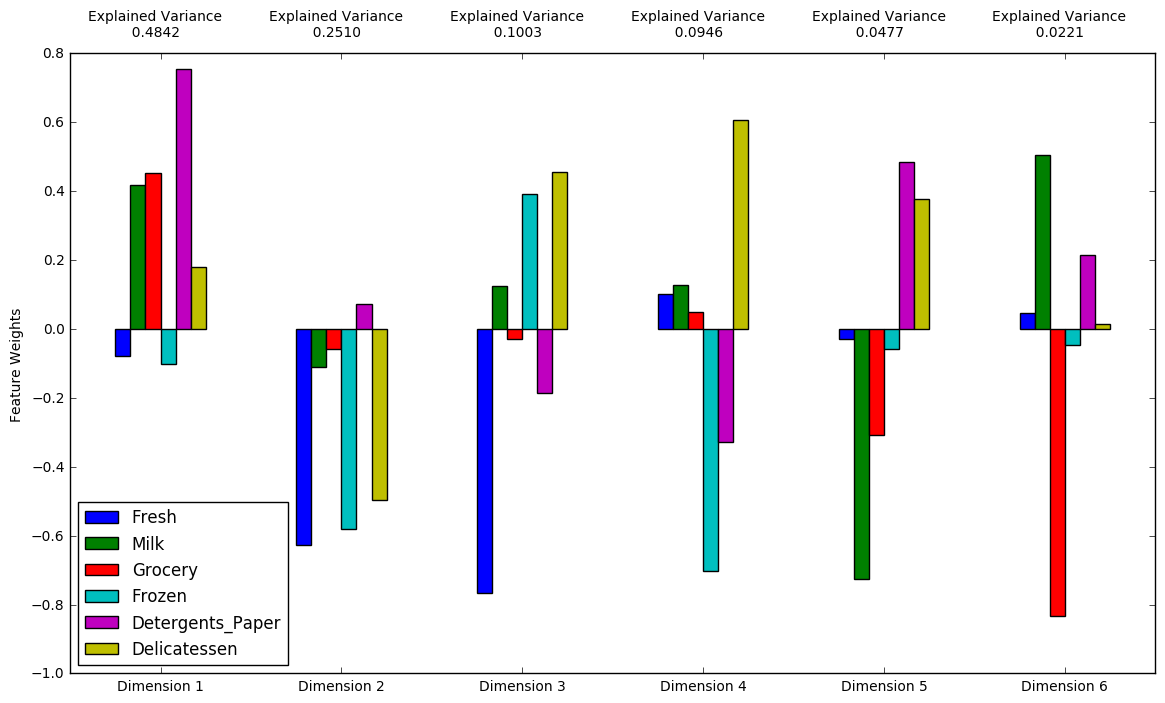

In [17]:
# applying the PCA                            
from sklearn.decomposition import PCA         
                                              
pca = PCA(n_components=len(good_data.keys())) 
pca.fit(good_data)                            

pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

*Total explained variance of the first and the second PC: *  0.7352

*Total explained variance of the first four PCs: *  0.9301

*First PC explanation: *
Customers who buy higher amounts of detergents, milk, groceries and delicacies while not buying a lot of Fresh or Frozen products will have high values in this feature.

*Second PC explanation: *
This feature is likely to be negative except in the cases where the customer buys only detergents and no products from the other categories at all (except maybe for small amounts of groceries or milk). Buying Fresh, Frozen or Delicacies leads to an especially negative value.

*Third PC explanation: *
Customers who buy mainly Delicacies and Frozen products, while not buying any Fresh products (and probably no detergents) at all, will have high values in this feature.

*Fourth PC explanation: *
Customers who mainly buy Delicacies and do not buy any detergents or frozen products will have high values in this feature.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1296,-0.8407,-1.0731,-1.0808,-0.0430,-0.2383
1,-1.6311,0.7505,0.2993,-0.7316,-0.6886,0.5784
2,-0.3236,-2.2827,-0.5586,-0.0614,0.4487,0.0431


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
pca_2 = PCA(n_components=2)
pca_2.fit(good_data)
reduced_data = pca_2.transform(good_data)

pca_samples = pca_2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1296,-0.8407
1,-1.6311,0.7505
2,-0.3236,-2.2827


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

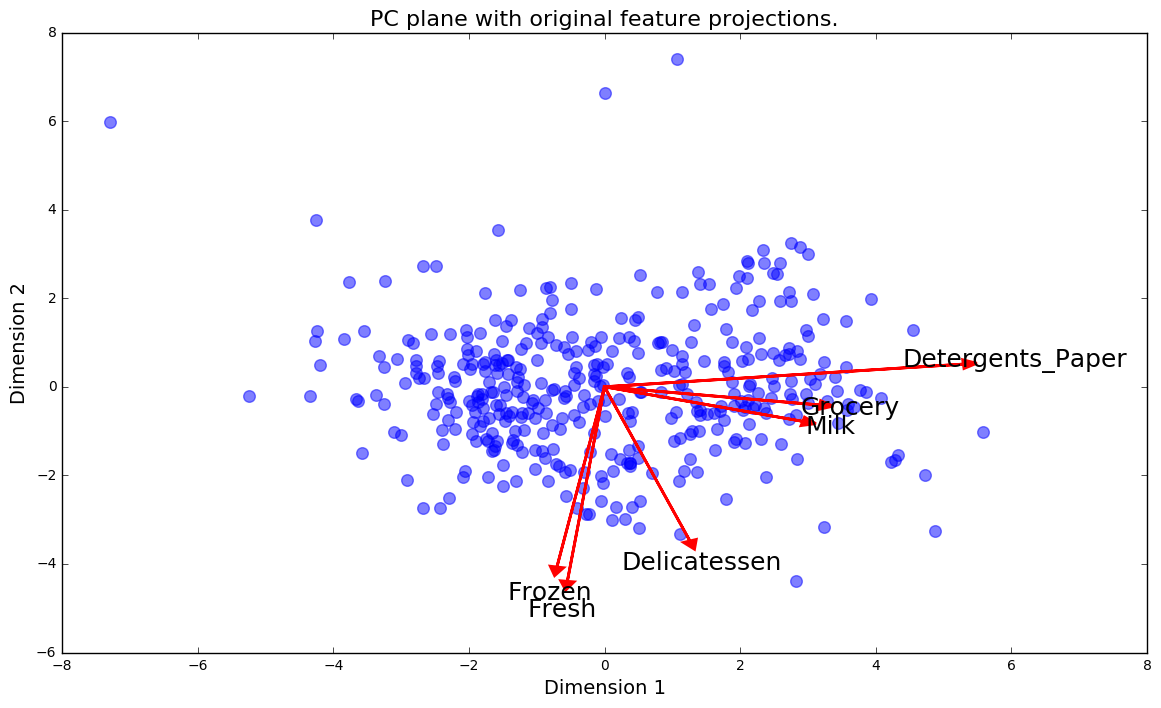

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

*Advantages K-means clustering:*
Works faster than GMM and has good performance if the underlying clusters are spherical and the features have no correlations.

*Advantages Gaussian Mixture Model clustering:*
In constrast to the K-means clustering, this clustering is softer. Data points do not get a hard assignment to a cluster. Instead, we assign them a probability that they belong to a certain cluster. Intuitively, I think that this approach is more suited to understand an unknown problem, especially when the number of underlying clusters is unknown. For example, if we use this clustering with a certain number of clusters and end up having a big amount of points that do not have high probabilities for any of the found clusters, we probably should consider to increase the number of clusters.

*Algorithm I will be using:*
As in this case, our primary goal is to learn more about the underlying patterns in the customer data, I prefer the GMM clustering. I would only turn to K-means in a case where I would experience performance problems.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

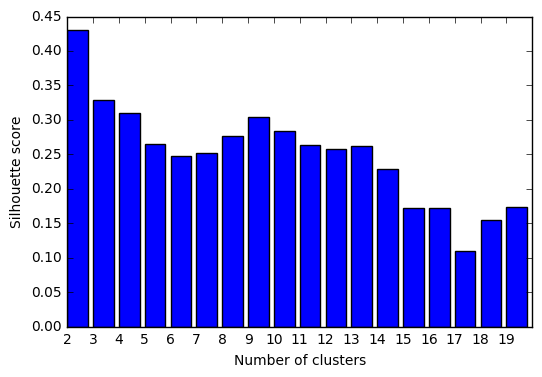

In [28]:
# I first had a look at the silhoette score for different numbers of clusters
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

def get_score(n_clusters):
    # make clusterer
    clusterer = GMM(n_components=n_clusters, random_state=1)
    # fit clusterer
    clusterer.fit(reduced_data)
    # make prediction for data
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    return score

x = np.arange(2, 20, 1)
plt.bar(x, map(get_score, x))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(x)
plt.show()

# clustering the data into two segments seems most promising based on the silhoette score. I will use 
# this cluster number in the following

clusterer = GMM(n_components=2, random_state=1)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
preds_sample = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# same thing for 9 clusters
clusterer_9 = GMM(n_components=9, random_state=1)

# TODO: Predict the cluster for each data point
clusterer_9.fit(reduced_data)
preds_9 = clusterer_9.predict(reduced_data)

# TODO: Find the cluster centers
centers_9 = clusterer_9.means_

# TODO: Predict the cluster for each transformed sample data point
preds_sample_9 = clusterer_9.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_9 = silhouette_score(reduced_data, preds_9)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The results are plotted in the bar plot above. With two clusters, we reach the highest score (about 0.43). Considering to use 9 clusters may also be interesting, as with nine clusters, we have a score of about 0.3 and may gain additional insight into the underlying patterns of the data.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

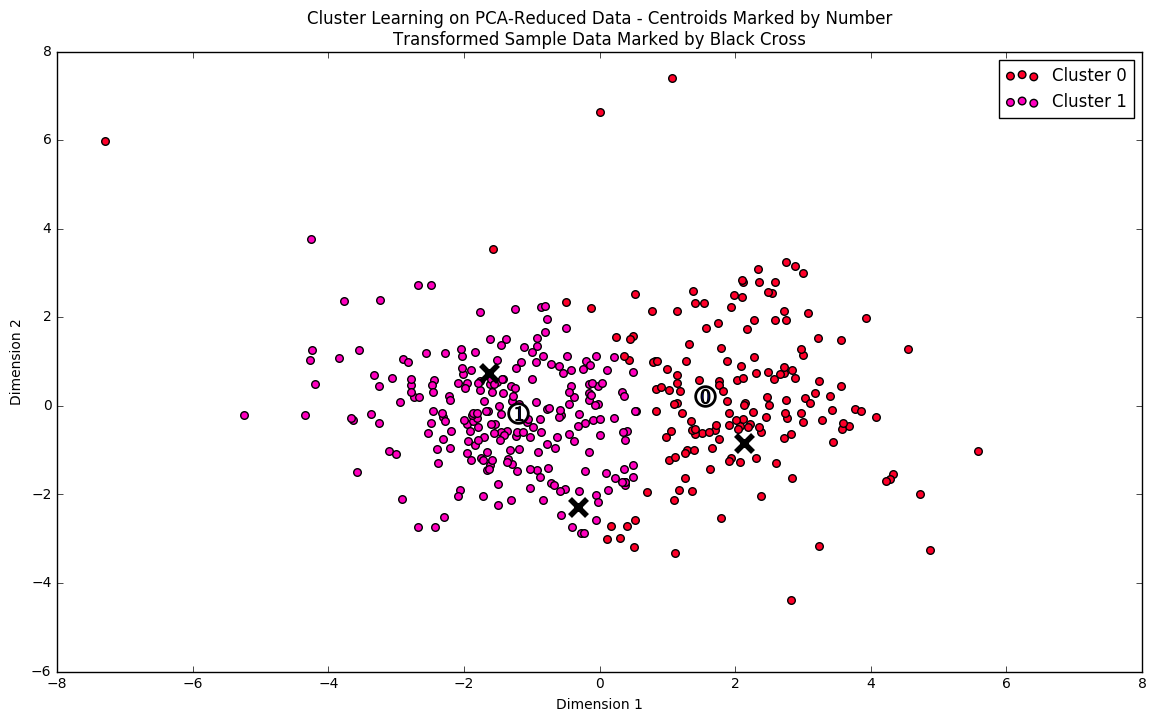

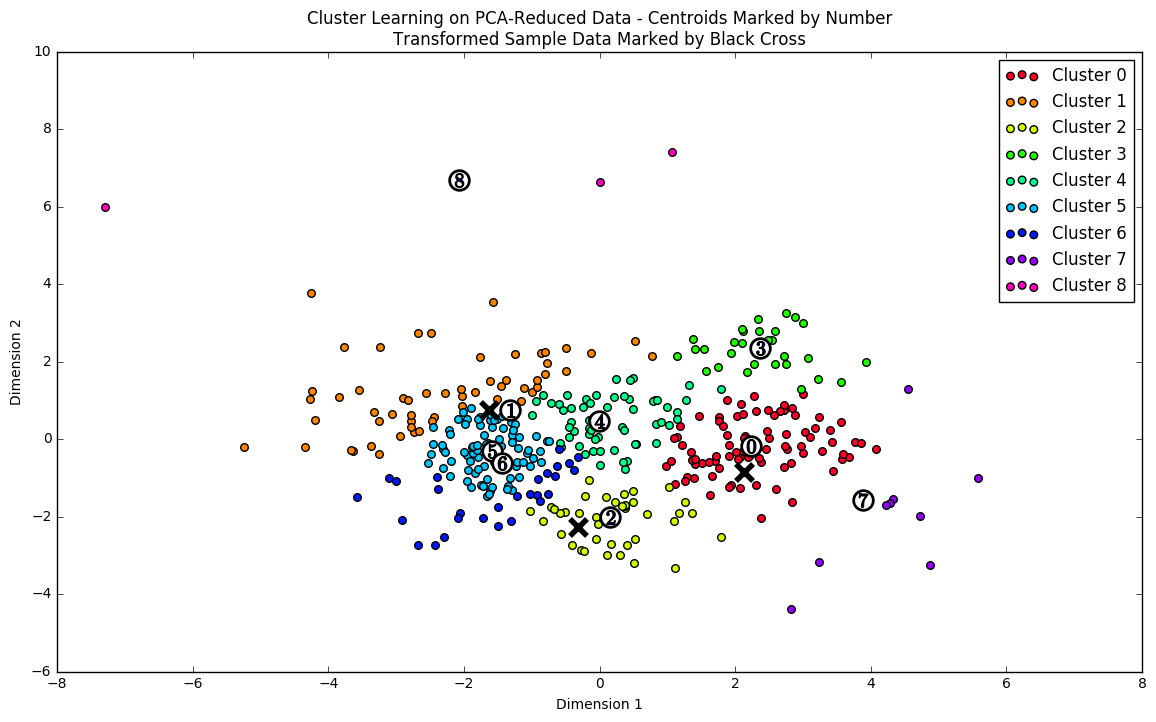

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples) # this is the optimal number of clusters

vs.cluster_results(reduced_data, preds_9, centers_9, pca_samples) 

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# Situation with two clusters
log_centers = pca_2.inverse_transform(centers)
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Situation with nine clusters
log_centers_9 = pca_2.inverse_transform(centers_9)
true_centers_9 = np.exp(log_centers_9)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers_9))]
true_centers_9 = pd.DataFrame(np.round(true_centers_9), columns = data.keys())
true_centers_9.index = segments
display(true_centers_9)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5671.0,6218.0,8970.0,1247.0,2887.0,1031.0
Segment 1,8958.0,2053.0,2628.0,2055.0,349.0,760.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6931.0,8644.0,12508.0,1473.0,4689.0,1424.0
Segment 1,5104.0,1769.0,2367.0,1224.0,343.0,473.0
Segment 2,25787.0,4447.0,5420.0,5271.0,850.0,2439.0
Segment 3,1405.0,6880.0,11429.0,335.0,6214.0,415.0
Segment 4,5483.0,3162.0,4371.0,1262.0,909.0,689.0
Segment 5,10057.0,1781.0,2234.0,2312.0,260.0,760.0
Segment 6,12033.0,1950.0,2419.0,2719.0,282.0,906.0
Segment 7,14524.0,20082.0,28656.0,2792.0,14735.0,3815.0
Segment 8,131.0,667.0,1188.0,42.0,299.0,22.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Note: Although using two clusters results in a higher silhouette score, I would like to answer this question for the case with 9 clusters (no real reason, it just seems more interesting :-) ).

Segment 0: Buying very high amounts of Groceries and Detergents and a relatively high amount of milk. Perhaps some kind of supermarket specializing on groceries.

Segment 1: Below average in all features suggests rather small establishments. Buying mainly fresh products. Probably a small shop mainly selling fresh food.

Segment 2: Significantly above average on fresh food. Above average on delicacies. Maybe some kind of storage facility acting as a redistributor of fresh food and delicacies for local restaurants etc.

Segment 3: High amounts of milk, detergents and groceries. Perhaps a cafe-like restaurant (milk for coffee, food and stuff to clean up).

Segment 4: Below average in all features but no significant minima in any particular feature. Probably a medium-sized shop offering most products.

Segment 5: Very high amounts of fresh products and very small amounts of the other products. Probably a bigger shop specializing in fresh products.

Segment 6: Similar distribution as Segment 5, yet on a bit bigger scale. Probably the same kind of shop but bigger.

Segment 7: Buying very high amounts of products in all categories. A very big establishment, either a big shop selling all kinds of products or a storage facility specilizing in redistribution.

Segment 8: Buying very small amounts of products, mostly groceries. Probably a very small grocery shop. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [34]:
# Display the predictions (done for the case with 9 clusters)
for i, pred in enumerate(preds_sample_9):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 5
Sample point 2 predicted to be in Cluster 2


**Answer:**

Yes, I do think that these predictions make sense considering the products purchased by the establishments in the sample. The assigned clusters also kind of match my initial guess about the kinds of establishments.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I think that we do have reasons to believe that the proposed change will not affect all customers equally. As the idea is to deliver less frequently, I could imagine two ways this could affect the customers:

1. Fresh products: Customers purchasing huge amounts of fresh products (Segments 2, 5, 6 and 7) may be displeased if they are delivered less often, as in these cases, they only can offer less fresh products to their customers.

2. Storage space: When the things are delivered less often, more things have to be delivered with each delivery. This will result in a requirement for more storage space. I think this might have a negative effect on smaller establishments (like those in the Segments 1, 4 and 8), which probably do not have a lot of storage space.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** I could imagine two approaches for this problem:

1. Use the centers of the clusters that were derived in the previous steps. The new customer will be assigned to the cluster associated with the center with the smallest distance to the data point of the new customer.

2. The cluster assignment found in the previous steps can be used to label the known data points. These labeled data points can then be used to train a supervised learning algorithm which later can be used to assign class (customer segment) labels to new, previously unknown data points (new customers). 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

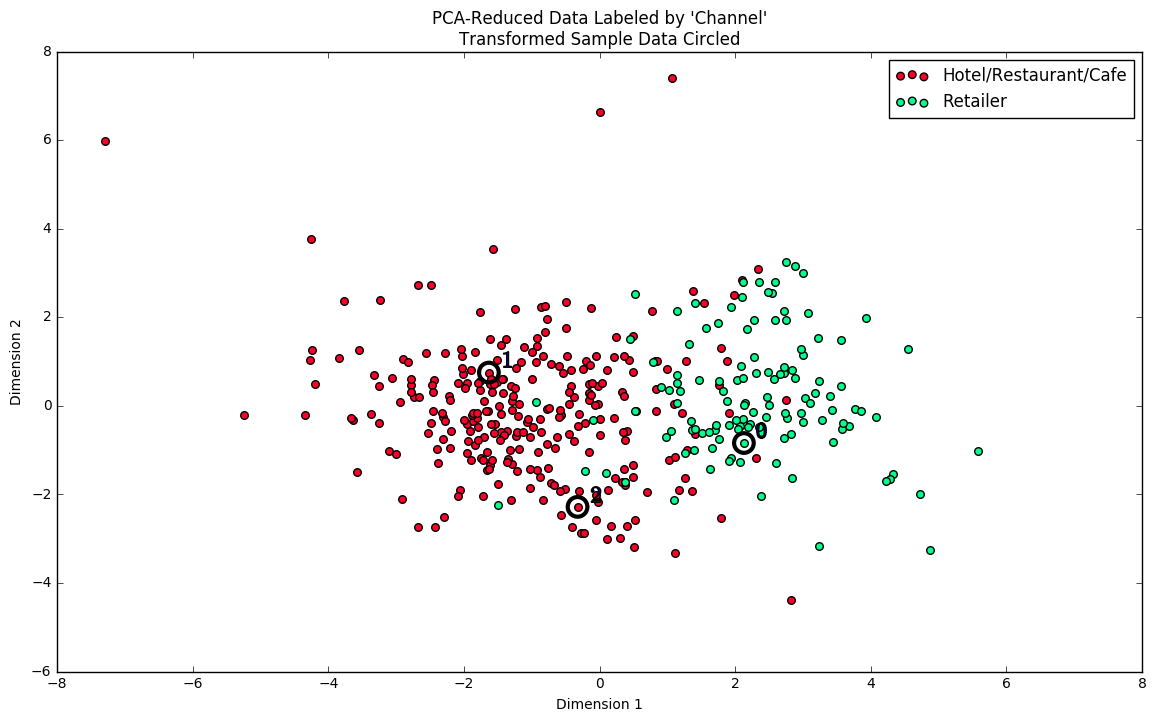

In [40]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, list(outliers_to_remove), pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The underlying distribution is very similar to the clustering when using 2 clusters. This is also the case which seemed most promising based on the silhouette score. I think when using 2 clusters, one could safely classify the data points in the cluster 1 as retailers and the points in the cluster 0 as Hotels/Restaurants/Cafes. I think one might say that the customer segments resulting from the usage of 9 clusters do also make sense with this classification, as the separation between the retailers and the rest kind of matches the separation between the individual clusters in the 9-cluster situation (the clusters 3, 0 and 7 might represent different sorts of retailers, while the other clusters represent different sorts of hotels, restaurants of cafes). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.